In [163]:
import glob
import numpy as np
import cv2
from PIL import Image
import PIL
import imutils
import skimage
from skimage import filters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,7)

In [164]:
def crop_name_seg(img):
    imgcrop = img[100:100+40, 90:90+490] 
    return imgcrop

In [165]:
def gaussianBlurring(img):
    blur1 = cv2.GaussianBlur(img, (5, 5), 0)
    return blur1

In [166]:
def inverte(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #ret,thresh1 = cv2.threshold(gray,137,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(gray,137,255,cv2.THRESH_BINARY_INV)
    return thresh2

In [167]:
def settozero(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO)
    return thresh

In [168]:
def conv_edges(img):
    convolution_matrix = np.array([[0,1,0],
                                  [1,-4,1],
                                  [0,1,0]]) #filtro/matriz para detecção de bordas
    edg = cv2.filter2D(img, -1, convolution_matrix)
    return edg

In [169]:
def sharpenFunction(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) #matriz de convolução que aplica nitidez
    return cv2.filter2D(image, -1, kernel)

In [170]:
def filterFunction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (T,Thresh1) = cv2.threshold(gray, 187, 255, cv2.THRESH_TRUNC)
    Thresh2 = cv2.adaptiveThreshold(Thresh1, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 231,50)
    return Thresh2

In [172]:
def bilateral(img):
    bil = cv2.bilateralFilter(img, 11, 77, 77) #3, 21, 21 #5, 35, 35 #7, 49, 49 #9, 63, 63 #11, 77, 77
    return bil

In [173]:
def thresholdLocal(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    T = skimage.filters.threshold_local(gray, 11, offset = 10, method = "gaussian")
    imag = (gray > T).astype("uint8") * 255
    return imag

In [174]:
def cleanImage(image, stage = 0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    # aplicando as operações topHat/blackHat
    topHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel) #revela as áreas claras com fundo escuro
    blackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel) #revela as áreas escuras com um fundo claro
    # fazendo adição e subtração entre as operações morfológicas
    add = cv2.add(gray, topHat)
    subtract = cv2.subtract(add, blackHat)
    if (stage == 1):
        return subtract
    T = filters.threshold_local(subtract, 29, offset=7, method="gaussian", mode="mirror")
    thresh = (subtract > T).astype("uint8") * 255
    if (stage == 2):
        return thresh
    # inverte a imagem 
    thresh = cv2.bitwise_not(thresh)
    return thresh

In [175]:
def find_contours(image):
    contours,hierarchy = cv2.findContours(dilate,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [185]:
# images = glob.glob("../newalinhadas/*jpg")

# for c in images:
    
#     img = cv2.imread(c)
    
#     tozero = settozero(img)
#     ret,thresh = cv2.threshold(tozero,125,255,cv2.THRESH_BINARY)

#     nitida = sharpenFunction(img)
#     filt = filterFunction(nitida)
#     blur = cv2.medianBlur(filt, 3)

#     bil = bilateral(img)
#     thlocal = thresholdLocal(bil) 
    
#     plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))
#     plt.show()

### Testando ocr

In [199]:
import pytesseract
from pytesseract import Output
import re

def data_keys(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    return d

def drawboxes(img, d):
    
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        #if int(d['conf'][i]) > 40:
        if int(d['left'][i]) > 90 and int(d['top'][i]) > 90:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img

#limpa caracteres não ASCII
def cleanup_text(text):
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

def extraiNome(img):
    crop = img[110:180, 120:850]
    text = pytesseract.image_to_string(crop, lang='por')
    name = cleanup_text(text)
    name = re.findall('[A-Z]+', name)
    nomecomp = ""
    
    for n in name:
        nomecomp += f" {n}"
    
    res = re.sub("NOME[ ]+", "", nomecomp)
    
    print(nomecomp)
    
    return crop

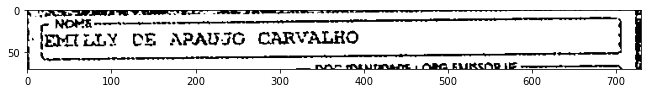

 E EUJLY DL APAE JG CARVALHO N


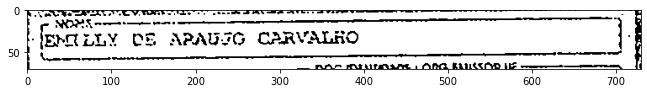

 M DE APJXUJG CARVALHO N


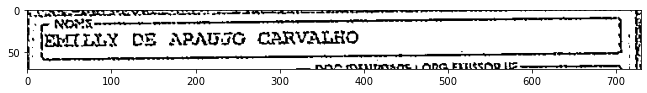

 N M LUCAS GABRIEL GUEDEH DE CARVALHO WQS


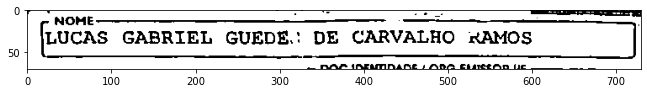

 N LUCAS GABRIEL GUEDES DE CARVALHO RAMOS


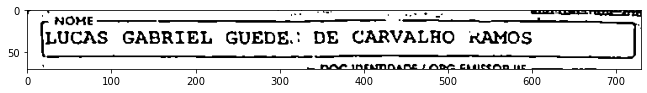

 NME LUCAS GABRIEL GUED DE CARVALHO RAMOS


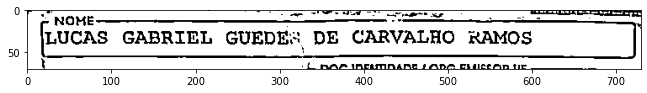

 NOME IARCOS ANTONIO GRISI FILHO


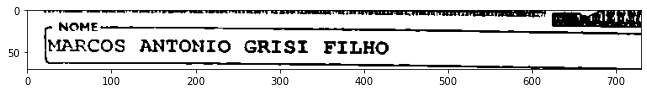

 NOME MARCOS ANTONIO GRISI FILHO


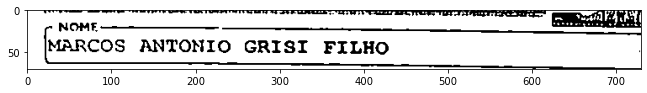

 NOME MARCOS ANTONIO GRISI FILHO


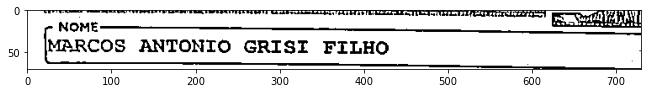

 N SERGIO DE FREITAS PEREIRA


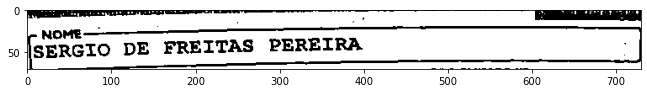

 N SERGIO DE FREITAS PEREIRA


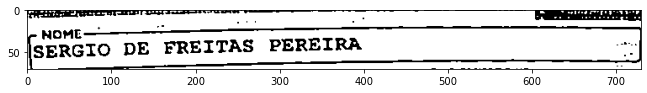

 SERGIO DE FREITAS PEREIRA


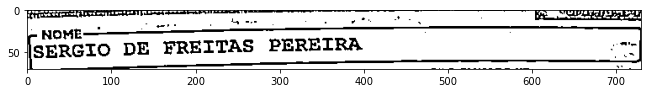

 NOME SERGIO DE FREITAS PEREIRA


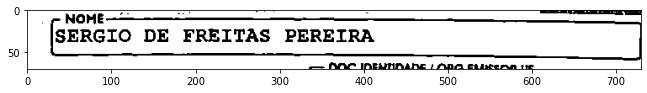

 NOME SERGIO DE FREITAS PEREIRA N


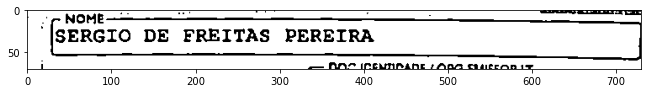

 NOHE SERGIO DE FREITAS PEREIRA H


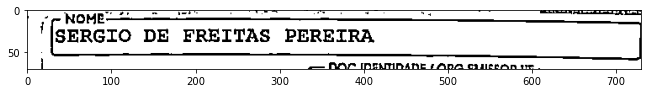

 NOHE SERGIO DE FREITAS PEREIRA


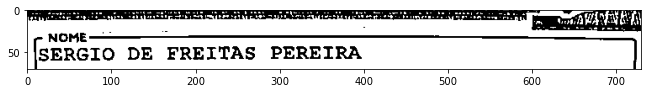

 NM WM SERGIO DE FREITAS PEREIRA


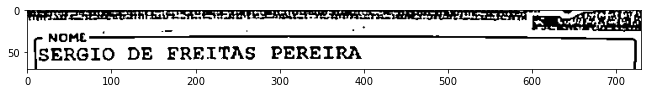

 NOHE SERGIO DE FREITAS PEREIRA


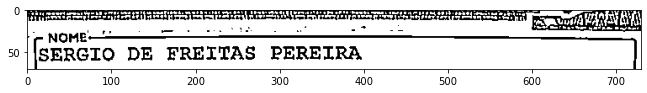

 NOME SERGIO DE FREITAS PEREIRA


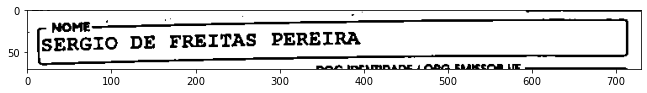

 M SERGIO DE FREITAS PEREIRA


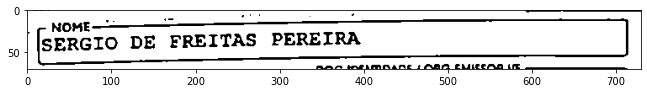

 NOME SERGIO DE FREITAS PEREIRA


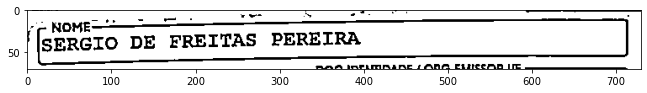

 MW NOME CARLOS AUGUSTO P IRA MAIA


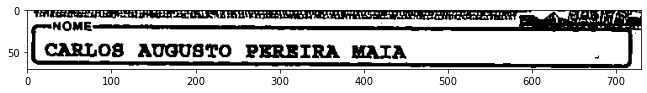

 CARLOS AUGUSTO PEREIRA BAIA


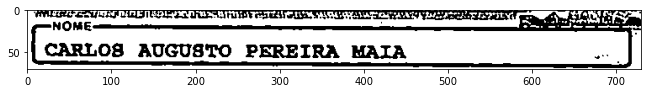

 CARLOS AUGUSTO PEREIRA MA


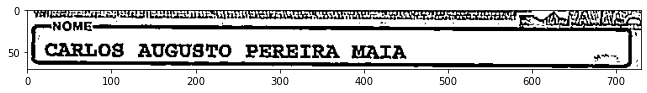

 ERGIO DE FREITAS PEREIRA


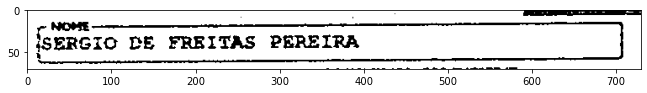

 DE FREITAS PEREIRA


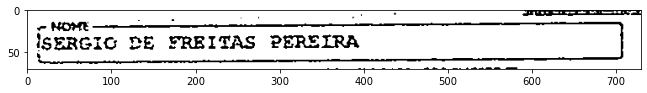

 L SERCIO DE FREITAS EEREIRA


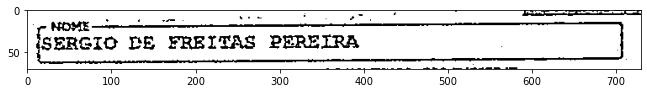

 EHILLY DE ARAUJO CARVALHO


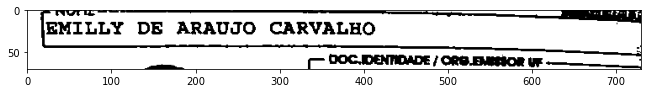

 IEMILLY DE ARAUJO CARVALHO


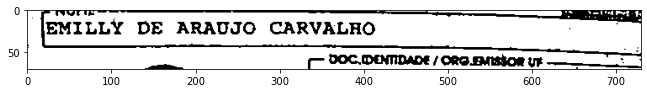

 WILLY DE ARAUJO CARVALHO


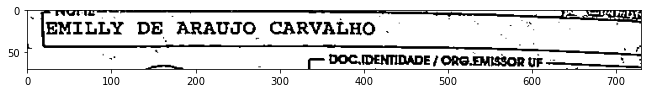

 MISI


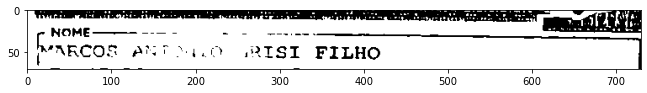

 W NOME IVARCOG ISI FILHO


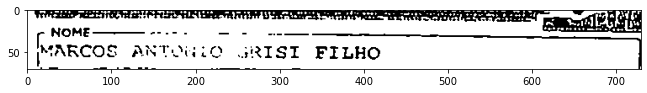

 NOME ARCOS ANTORHO GRISI FILHO


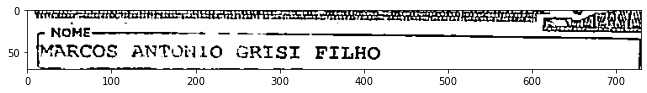

 EMILLY DE ARAUJO CARVALHO NW M M


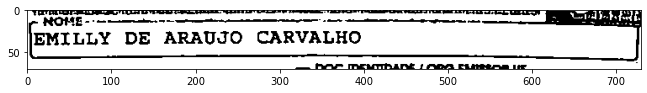

 EHILLY DE ARAUJO CARVALHO M M


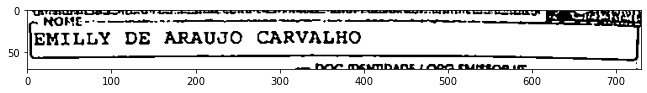

 EMILLY DE ARAUJO CARVALHO


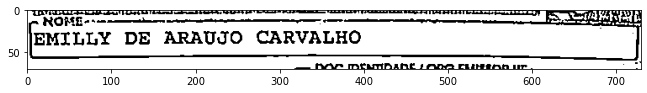

 ICARLOB AUGUSTO PEREIRA IRIA


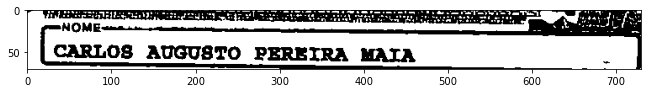

 N OME ICARLOS AUGUSTO PEREIRA MAIA


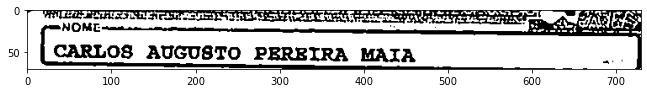

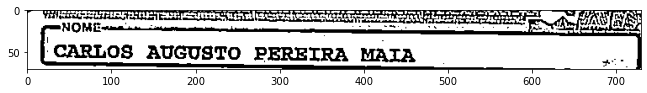

 COS ANTONIO GRISI FILHO


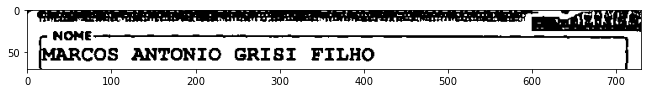

 NON COS ANTONIO GRISI FILHO


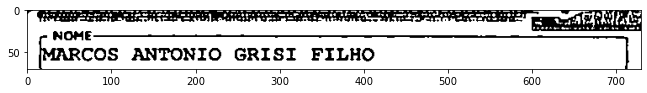

 WEKWW NOME COS ANTONIO GRISI FILHO


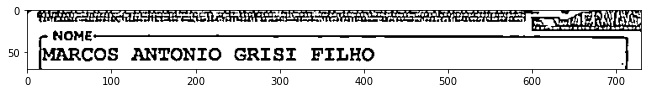

 NOME EMILLY DE ARAUJO CARVALHO DOCMN N


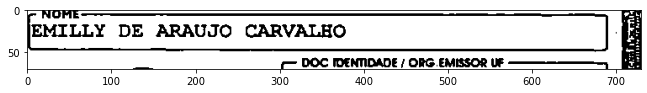

 N EMILLY DE ARAUJO CARVALHO DOCMNHMDEIORG


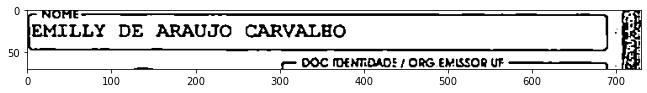

 NOME EMILLY DE ARAUJO CARVALHO D IDENTIDADE OHGLMBSOR UF


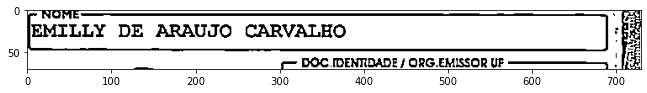

In [202]:
images = glob.glob("../newalinhadas/*jpg")

for c in images:
    img = cv2.imread(c)
    
    tozero = settozero(img)
    ret,thresh = cv2.threshold(tozero,125,255,cv2.THRESH_BINARY)
    nome = extraiNome(thresh)
    plt.imshow(cv2.cvtColor(nome, cv2.COLOR_BGR2RGB))
    plt.show()

    nitida = sharpenFunction(img)
    filt = filterFunction(nitida)
    blur = cv2.medianBlur(filt, 3)
    nome1 = extraiNome(blur)
    plt.imshow(cv2.cvtColor(nome1, cv2.COLOR_BGR2RGB))
    plt.show()
    
    bil = bilateral(img)
    thlocal = thresholdLocal(bil)
    nome2 = extraiNome(thlocal)
    plt.imshow(cv2.cvtColor(nome2, cv2.COLOR_BGR2RGB))
    plt.show()
    
#     keys = data_keys(thlocal)
#     boxes = drawboxes(img, keys)
#     plt.imshow(cv2.cvtColor(boxes, cv2.COLOR_BGR2RGB))
#     plt.show()

### Resultados

Os resultados usando a função image_to_data foram basicamentes os mesmos em todas as segmentações;

> Visualmente os melhores filtros são: 
    Sharpen + Adaptative (FilterFunction) + medianBlur e Bilateral + ThresholdLocal
    
 
> Na leitura dos nomes os melhores filtros foram o 2 e o 3